In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from rich import print as rp
from typing import Optional
from pyplier.PLIERRes import PLIERResults

sns.set_theme()
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
auc_cutoff: float = 0.6
fdr_cutoff: float = 0.05
indexCol: Optional[list[str]] = None
indexRow: Optional[list[str]] = None
top: int = 3
sort_row: bool = False

In [4]:
plierRes = PLIERResults.from_disk(
    "/Users/milessmith/workspace/pyplier/tests/data/common/plierRes.json.gz"
)

In [5]:
# R version:
# if (is.null(indexCol)) {
#     indexCol <- 1:ncol(plierRes$U)
# }
# if (is.null(indexRow)) {
# indexRow <- 1:nrow(plierRes$U)
# }

# U <- plierRes$U
# pval.cutoff <- max(plierRes$summary[plierRes$summary[, 5] < fdr.cutoff, 4])
# U[plierRes$Uauc < auc.cutoff] <- 0
# U[plierRes$Up > pval.cutoff] <- 0

In [6]:
if indexCol is None:
    indexCol = plierRes.U.columns

if indexRow is None:
    indexRow = plierRes.U.index

U = plierRes.U.copy()
pval_cutoff = plierRes.summary.loc[
    plierRes.summary["FDR"] < fdr_cutoff, "p-value"
].max()
U[plierRes.Uauc < auc_cutoff] = 0
U[plierRes.Up > pval_cutoff] = 0

U = U.loc[indexRow, indexCol]

In [7]:
# R version:
# for (i in seq(ncol(U))) {
#    ct <- sort(U[, i], T)[top]
#    U[U[, i] < ct, i] <- 0
# }

In [8]:
U.shape[1]

30

In [9]:
ct = U.iloc[:,0].nlargest(5).values

In [10]:
U['LV11'].nlargest(3)[-1]

0.0930343298144597

In [11]:
def replace_below_top(sr: pd.Series, n: int=3, replace_val: int=0) -> pd.Series:
    sr[sr < sr.nlargest(n)[-1]] = replace_val
    return sr

In [12]:
newU = U.apply(replace_below_top, n=2)

In [13]:
newU['LV2'].sort_values(ascending=False)

IRIS_Neutrophil-Resting                                                                                       0.298236
IRIS_Monocyte-Day0                                                                                            0.018663
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY                                                                          0.000000
KEGG_OOCYTE_MEIOSIS                                                                                           0.000000
REACTOME_TRANSPORT_OF_GLUCOSE_AND_OTHER_SUGARS_BILE_SALTS_AND_ORGANIC_ACIDS_METAL_IONS_AND_AMINE_COMPOUNDS    0.000000
                                                                                                                ...   
REACTOME_PHASE_II_CONJUGATION                                                                                 0.000000
KEGG_NEUROTROPHIN_SIGNALING_PATHWAY                                                                           0.000000
KEGG_COLORECTAL_CANCER                          

In [14]:
# R version:
# if (sort.row) {
#     Utmp <- sweep(sign(U), 2, 1:ncol(U) * 100, "*")
#     Um <- apply(Utmp, 1, max)
#     show(Um[Um != 0])
#     U <- U[order(-Um), ]
#     plotMat(U, cluster_row = F, ...)
# } else {
#     plotMat(U, ...)
# }

In [15]:
Utmp = np.multiply(np.sign(U), 100)
Utmp

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV21,LV22,LV23,LV24,LV25,LV26,LV27,LV28,LV29,LV30
IRIS_Bcell-Memory_IgG_IgA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
IRIS_Bcell-Memory_IgM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
IRIS_Bcell-naive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
IRIS_CD4Tcell-N0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
IRIS_CD4Tcell-Th1-restimulated12hour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PID_IL4_2PATHWAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
PID_BCR_5PATHWAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
PID_TELOMERASEPATHWAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0


In [16]:
Um = pd.DataFrame({x: np.multiply((U.columns.get_loc(x)+1)*100, np.sign(y)) for x, y in U.iteritems()}).max(axis=1)
Um

IRIS_Bcell-Memory_IgG_IgA                           0.0
IRIS_Bcell-Memory_IgM                            1500.0
IRIS_Bcell-naive                                 1500.0
IRIS_CD4Tcell-N0                                    0.0
IRIS_CD4Tcell-Th1-restimulated12hour                0.0
                                                  ...  
PID_IL4_2PATHWAY                                    0.0
REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR       0.0
PID_BCR_5PATHWAY                                    0.0
PID_TELOMERASEPATHWAY                               0.0
PID_PI3KPLCTRKPATHWAY                               0.0
Length: 606, dtype: float64

In [17]:
from pyplier.plotMat import plotMat

In [18]:
U.loc[Um.rank(ascending=False).sort_values().index]

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV21,LV22,LV23,LV24,LV25,LV26,LV27,LV28,LV29,LV30
REACTOME_PEPTIDE_CHAIN_ELONGATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.000000,0,0.0,0.145989
REACTOME_TRANSLATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.000000,0,0.0,0.137386
IRIS_DendriticCell-LPSstimulated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.119418,0,0.0,0.000000
REACTOME_INTERFERON_ALPHA_BETA_SIGNALING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.227063,0,0.0,0.000000
DMAP_DENDA1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.123742,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.000000,0,0.0,0.000000
REACTOME_CIRCADIAN_CLOCK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.000000,0,0.0,0.000000
REACTOME_TRANSPORT_OF_MATURE_MRNA_DERIVED_FROM_AN_INTRONLESS_TRANSCRIPT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.000000,0,0.0,0.000000
REACTOME_VIF_MEDIATED_DEGRADATION_OF_APOBEC3G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.000000,0.000000,0,0.0,0.000000


{'iirow': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 'iicol': array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 17, 19, 22, 25, 26,
        29])}

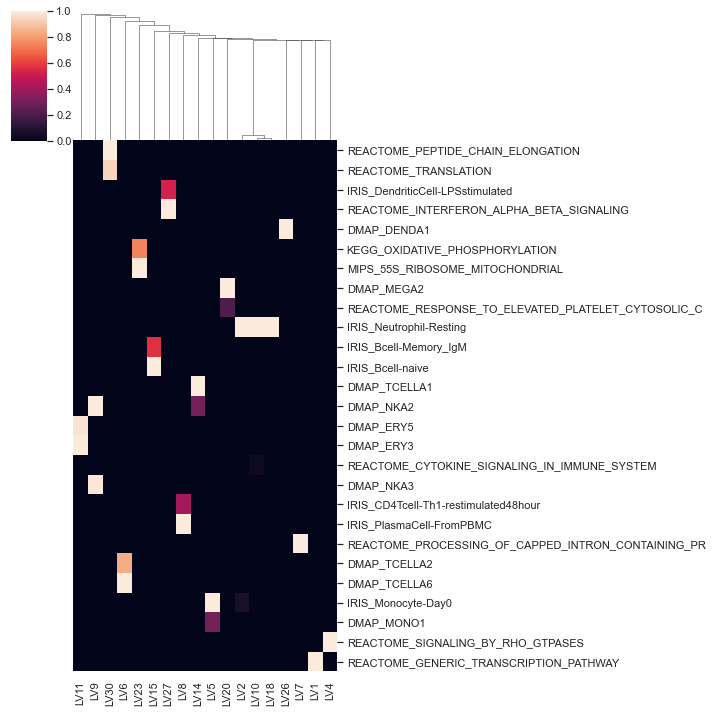

In [19]:
plotMat(U.loc[Um.rank(ascending=False).sort_values().index], row_cluster=False)

{'iirow': array([  1,   2,   5,  10,  13,  19,  21,  28,  33,  35,  43,  45,  48,
         49,  53,  54,  57, 137, 164, 176, 185, 208, 232, 338, 533, 574,
        575]),
 'iicol': array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 17, 19, 22, 25, 26,
        29])}

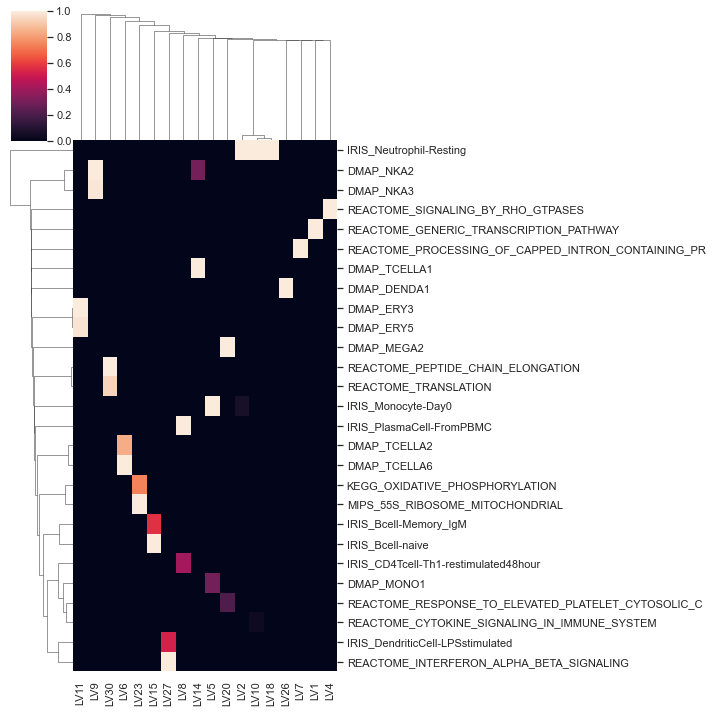

In [20]:
plotMat(U, row_cluster=True)